In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import geopandas 
from shapely import wkt
import folium
import geodatasets

ModuleNotFoundError: No module named 'geopandas'

In [3]:
cities = pd.read_csv('data/cities.csv')

In [4]:
cities
cities['Coordinates'] = geopandas.GeoSeries.from_wkt(cities['coords'])
gdf = geopandas.GeoDataFrame(cities, geometry='Coordinates')

NameError: name 'geopandas' is not defined

In [6]:
gdf = gdf.set_crs("EPSG:4326")
m = folium.Map(location=[40.70, -73.94], zoom_start=10, tiles="CartoDB positron")

for _, r in gdf.iterrows():
    lat =r["Coordinates"].y
    lon = r['Coordinates'].x
    folium.Marker(
        location=[lat, lon],
    ).add_to(m)

NameError: name 'gdf' is not defined

In [8]:
m.save('Images/map.html')

NameError: name 'm' is not defined

In [7]:
lines = pd.read_csv('data/lines.csv')

In [ ]:
lines = lines.rename(columns={'name': 'line_name'})

In [9]:
lst = ['data/station_lines.csv', 'data/stations.csv', 'data/systems.csv', 'data/track_lines.csv', 'data/tracks.csv']
station_lines = pd.read_csv(lst[0])
stations = pd.read_csv(lst[1])
systems = pd.read_csv(lst[2])
track_lines = pd.read_csv(lst[3])
tracks = pd.read_csv(lst[4])

In [10]:
tracks

,id,geometry,buildstart,opening,closure,length,city_id
0,1911,"LINESTRING(19.0817752 47.5005079,19.0817355 47...",0.0,0.0,999999.0,6719,29
1,2563,"LINESTRING(16.4151057 48.1907238,16.4156455 48...",0.0,0.0,999999.0,199,118
2,2557,"LINESTRING(16.4164437 48.1839655,16.4161534 48...",0.0,0.0,999999.0,925,118
3,2558,"LINESTRING(16.4164901 48.1839473,16.416198 48....",0.0,0.0,999999.0,881,118
4,2564,"LINESTRING(16.415259 48.1908074,16.4153634 48....",0.0,0.0,999999.0,213,118
...,...,...,...,...,...,...,...
9266,9732,"LINESTRING(-3.838067 56.0044551,-3.8385588 56....",0.0,0.0,999999.0,383,48
9267,9734,"LINESTRING(-3.8549229 55.9960854,-3.8544735 55...",0.0,0.0,999999.0,28,48
9268,9735,"LINESTRING(-3.8597111 55.9955538,-3.8572319 55...",0.0,0.0,999999.0,305,48
9269,9736,"LINESTRING(-3.8544735 55.9961285,-3.8529015 55...",0.0,0.0,999999.0,828,48


In [11]:
lines_drop = lines.copy()
lines_drop = lines_drop.drop(columns=['url_name', 'color', 'transport_mode_id'])

In [12]:
lines_drop

,id,city_id,name,system_id
0,43,4,Línea 2,267
1,75,34,Línea 3 Metro de Caracas,119
2,107,126,Línea 1,249
3,604,74,La navette,346
4,61,66,Línea 1 (Tramo 1A),250
...,...,...,...,...
1338,1466,124,Ramaditas,493
1339,1467,124,Polanco,493
1340,1468,124,Delicias,493
1341,1469,124,Perdices,493


In [13]:
cities

,id,name,coords,start_year,url_name,country,country_state
0,5,Aberdeen,POINT(-2.15 57.15),2017.0,aberdeen,Scotland,NaN
1,6,Adelaide,POINT(138.6 -34.91666667),2017.0,adelaide,Australia,NaN
2,7,Algiers,POINT(3 36.83333333),2017.0,algiers,Algeria,NaN
3,9,Ankara,POINT(32.91666667 39.91666667),2017.0,ankara,Turkey,NaN
4,16,Belém,POINT(-48.48333333 -1.466666667),2017.0,belem,Brazil,NaN
...,...,...,...,...,...,...,...
329,265,Nantes,POINT(-1.553889 47.217222),1877.0,nantes,France,NaN
330,110,Stockholm,POINT(18.05 59.28333333),1919.0,stockholm,Sweden,NaN
331,266,Rennes,POINT(-1.680833 48.114167),1897.0,rennes,France,NaN
332,15,Beijing,POINT(116.4166667 39.91666667),1965.0,beijing,China,NaN


In [14]:
cities_drop = cities.copy()
cities_drop = cities_drop.drop(columns='url_name')
cities_usa = cities_drop[cities_drop['country'] == "United States"]

In [24]:
cities_lines = lines_drop.merge(cities_usa, left_on='city_id', right_on='id', how='left')

In [16]:
cities_lines

,id_x,city_id,name_x,system_id,id_y,name_y,coords,start_year,country,country_state
0,43,4,Línea 2,267,NaN,NaN,NaN,NaN,NaN,NaN
1,75,34,Línea 3 Metro de Caracas,119,NaN,NaN,NaN,NaN,NaN,NaN
2,107,126,Línea 1,249,NaN,NaN,NaN,NaN,NaN,NaN
3,604,74,La navette,346,NaN,NaN,NaN,NaN,NaN,NaN
4,61,66,Línea 1 (Tramo 1A),250,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1338,1466,124,Ramaditas,493,NaN,NaN,NaN,NaN,NaN,NaN
1339,1467,124,Polanco,493,NaN,NaN,NaN,NaN,NaN,NaN
1340,1468,124,Delicias,493,NaN,NaN,NaN,NaN,NaN,NaN
1341,1469,124,Perdices,493,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
cities_lines = cities_lines.rename(columns={'name':'city', 'city_id': 'id'}).dropna(subset='city')

KeyError: ['city']

In [18]:
cities_lines

,id_x,city_id,name_x,system_id,id_y,name_y,coords,start_year,country,country_state
0,43,4,Línea 2,267,NaN,NaN,NaN,NaN,NaN,NaN
1,75,34,Línea 3 Metro de Caracas,119,NaN,NaN,NaN,NaN,NaN,NaN
2,107,126,Línea 1,249,NaN,NaN,NaN,NaN,NaN,NaN
3,604,74,La navette,346,NaN,NaN,NaN,NaN,NaN,NaN
4,61,66,Línea 1 (Tramo 1A),250,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1338,1466,124,Ramaditas,493,NaN,NaN,NaN,NaN,NaN,NaN
1339,1467,124,Polanco,493,NaN,NaN,NaN,NaN,NaN,NaN
1340,1468,124,Delicias,493,NaN,NaN,NaN,NaN,NaN,NaN
1341,1469,124,Perdices,493,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
cities_stations = stations.merge(cities_usa, left_on='city_id', right_on='id', how='left')
cities_stations = cities_stations.rename(columns={'name_y':'city', 'city_id':'id'}).dropna(subset='city')
cities_stations = cities_stations[cities_stations['buildstart']> 0]
cities_stations['buildstart'] = cities_stations['buildstart'].astype(int)

<Axes: xlabel='city'>

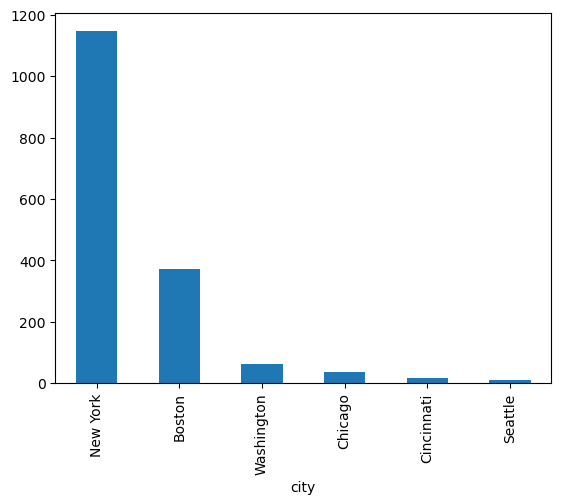

In [20]:
cities_stations['city'].value_counts().plot.bar()

In [21]:
#cities_stations = cities_stations[(cities_stations['city'] != 'Chicago') & (cities_stations['city'] != 'Los Angeles')]

In [22]:
cities_stations

,id_x,name_x,geometry,buildstart,opening,closure,id,id_y,city,coords,start_year,country,country_state
351,13713,Sands Street,POINT(-73.9900595885681 40.6999957881726),1888,1888.0,1944.0,206,206.0,New York,POINT(-73.96666667 40.78333333),1832.0,United States,N.Y.
460,13712,Sands Street,POINT(-73.9909195185139 40.7000028855033),1888,1888.0,1940.0,206,206.0,New York,POINT(-73.96666667 40.78333333),1832.0,United States,N.Y.
524,13715,Franklin Avenue,POINT(-73.9558290151206 40.6809373893361),1896,1896.0,99999.0,206,206.0,New York,POINT(-73.96666667 40.78333333),1832.0,United States,N.Y.
525,13714,Bedford,POINT(-73.9560530103624 40.6791577907764),1878,1878.0,1896.0,206,206.0,New York,POINT(-73.96666667 40.78333333),1832.0,United States,N.Y.
634,13717,Dean Street,POINT(-73.9564989741619 40.6777795584306),1896,1896.0,1995.0,206,206.0,New York,POINT(-73.96666667 40.78333333),1832.0,United States,N.Y.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14575,15192,Norfolk,POINT(-71.3261011996674 42.120294412191),1848,1848.0,1973.0,139,139.0,Boston,POINT(-71.08333333 42.35),1806.0,United States,Mass.
14576,15193,Walpole,POINT(-71.2586450694808 42.1451153888067),1848,1848.0,1973.0,139,139.0,Boston,POINT(-71.08333333 42.35),1806.0,United States,Mass.
14578,15194,Plimptonville,POINT(-71.2367123990138 42.1585522303421),1849,1849.0,1973.0,139,139.0,Boston,POINT(-71.08333333 42.35),1806.0,United States,Mass.
14579,15195,Windsor Gardens,POINT(-71.2197960744587 42.1718030621639),1971,1971.0,1973.0,139,139.0,Boston,POINT(-71.08333333 42.35),1806.0,United States,Mass.


New York
Washington
Seattle
Chicago
Boston
Cincinnati


[]

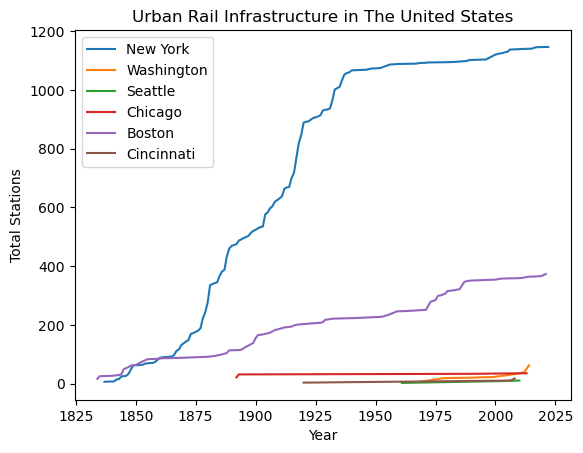

In [23]:
def cityplot():
    for city in cities_stations['city'].unique():
        print(city)
        ax = cities_stations[cities_stations['city'] == city].groupby('buildstart').size().cumsum().plot(
        x='buildstart', y='0', xlabel='Year', ylabel='Total Stations')
    return ax
ax = cityplot()
ax.set_title('Urban Rail Infrastructure in The United States')
ax.legend(cities_stations['city'].unique())
ax.plot()

In [ ]:
cities_stations['buildstart'].plot.hist(ylabel='Number of Stations Built', xlabel='Year').set_title('Stations Built in the United States')

In [ ]:
ax = sns.histplot(data=cities_stations, x='buildstart', hue='city')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Stations Built')
fig = ax.get_figure()
fig.set_figheight(8)
fig.set_figwidth(8)

In [ ]:
cities_lines

In [ ]:
cities_lines = cities_lines.drop(columns=['id_x', 'id_y', 'system_id'])

In [ ]:
cities_lines_stations = stations.merge(cities_lines, left_on='city_id', right_on='id', how='left')

In [ ]:
cities_lines_stations = cities_lines_stations.dropna(subset='city')

In [ ]:
cities_lines_stations.sort_values(by='city_id')

In [ ]:
cls = cities_stations.rename(columns={'Coordinates': 'City Coordinates'})

In [ ]:
cls['Station Coordinates'] = geopandas.GeoSeries.from_wkt(cls['geometry'])
gdf = geopandas.GeoDataFrame(cls, geometry='Station Coordinates')

In [ ]:
tracks['geometry'] = tracks['geometry'].apply(wkt.loads)

In [ ]:
#tracks['tracks_coords'] = geopandas.GeoSeries.from_wkt(cls['geometry'])

In [ ]:
#tracks = tracks.drop(columns='tracks_coords')


In [ ]:
tracks_gdf = geopandas.GeoDataFrame(tracks)

In [ ]:
tracks_gdf= tracks_gdf.set_crs("EPSG:4326")

In [ ]:
tracks_gdf

In [ ]:
def build_map(gdf, column):
    gdf = gdf.set_crs("EPSG:4326")
    m = folium.Map(location=[40.70, -73.94], zoom_start=10, tiles="CartoDB positron")

    for _, r in gdf.iterrows():
        lat = r[column].y
        lon = r[column].x
        folium.Marker(
            location=[lat, lon],
        ).add_to(m)
   

In [ ]:
def add_lines(gdf, column)
    gdf = gdf.set_crs('EPSG:4326')
    

In [ ]:
build_map(gdf, 'City Coordinates')
build_map(gdf, 'Station Coordinates')
build_map(tracks_gdf, 'geometry')

In [ ]:
m.save('Images/map.html')

In [ ]:
cities_id = cities_usa.rename(columns={'id':'city_id'})

In [ ]:
cities_line = lines_drop.merge(citi)

In [ ]:
cities_line

In [ ]:
stations

In [ ]:
stations_drop = stations.copy()
#stations_usa = stations_drop[stations_drop['country'] == "United States"]
#stations_drop['cities'] = stations_drop[[stations_drop['city_id']== 147]] = 'Chicago'
stations_drop = stations_drop.dropna(subset='buildstart')
stations_drop = stations_drop[stations_drop['buildstart'] == 0] = np.nan

In [ ]:
stations_drop